In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
from fastai import *
from fastai.vision import *

Using the DHCD dataset from https://archive.ics.uci.edu/ml/datasets/Devanagari+Handwritten+Character+Dataset , and training a Resnet model using Fastai libary (v1.x)

It's the MNIST equivalent for देवनागरी (Devanagari) script.

In [ ]:
path = Path("/work/data/DHCD")

In [ ]:
path.ls()

['valid', 'train']

In [ ]:
data = ImageDataBunch.from_folder(path, size=26)

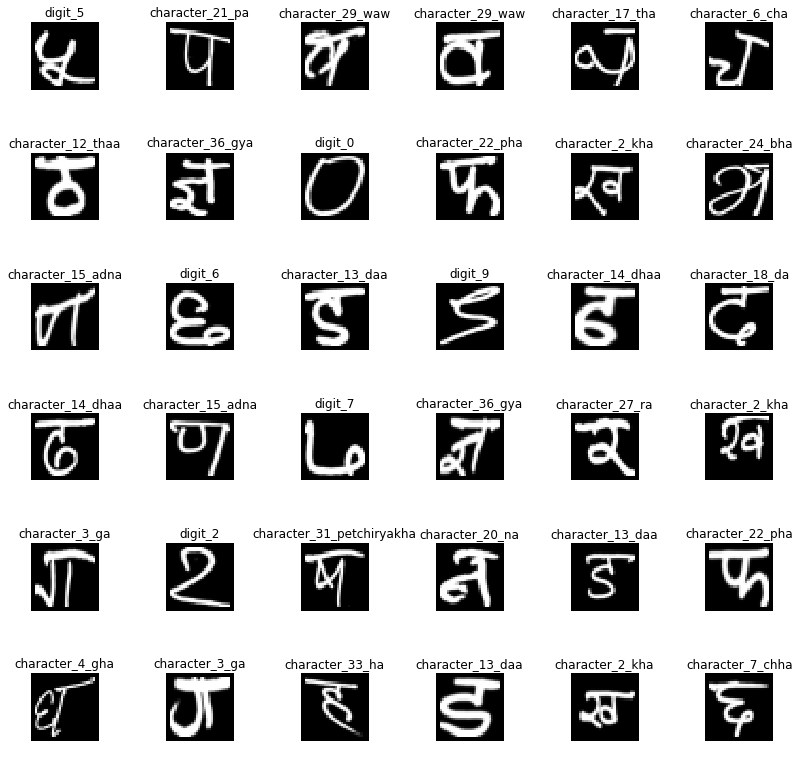

In [ ]:
data.show_batch(rows=6, figsize=(11,11))

In [ ]:
print(data.classes)

['character_10_yna', 'character_11_taamatar', 'character_12_thaa', 'character_13_daa', 'character_14_dhaa', 'character_15_adna', 'character_16_tabala', 'character_17_tha', 'character_18_da', 'character_19_dha', 'character_1_ka', 'character_20_na', 'character_21_pa', 'character_22_pha', 'character_23_ba', 'character_24_bha', 'character_25_ma', 'character_26_yaw', 'character_27_ra', 'character_28_la', 'character_29_waw', 'character_2_kha', 'character_30_motosaw', 'character_31_petchiryakha', 'character_32_patalosaw', 'character_33_ha', 'character_34_chhya', 'character_35_tra', 'character_36_gya', 'character_3_ga', 'character_4_gha', 'character_5_kna', 'character_6_cha', 'character_7_chha', 'character_8_ja', 'character_9_jha', 'digit_0', 'digit_1', 'digit_2', 'digit_3', 'digit_4', 'digit_5', 'digit_6', 'digit_7', 'digit_8', 'digit_9']


In [ ]:
len(data.classes)

46

## Training: resnet34

In [ ]:
learn = ConvLearner(data, models.resnet34, metrics=error_rate)

In [ ]:
learn.fit_one_cycle(4)

Total time: 02:38
epoch  train loss  valid loss  error_rate
1      0.737694    0.459541    0.140145    (00:39)
2      0.311525    0.174669    0.053188    (00:39)
3      0.194254    0.110949    0.034783    (00:39)
4      0.162790    0.098285    0.029058    (00:39)



In [ ]:
learn.save('stage-1')

## Unfreezing and fine-tuning

In [ ]:
learn.unfreeze()

In [ ]:
learn.lr_find()

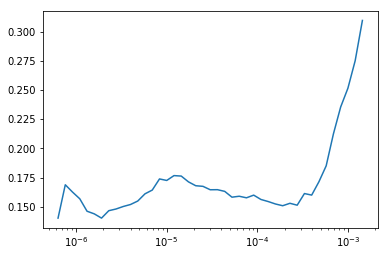

In [ ]:
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(3, max_lr=slice(1e-6,1e-4))

Total time: 02:23
epoch  train loss  valid loss  error_rate
1      0.125162    0.085671    0.026522    (00:47)
2      0.104390    0.067089    0.020725    (00:47)
3      0.076836    0.062726    0.018406    (00:48)



In [ ]:
learn.save('stage-2')

In [ ]:
learn.fit_one_cycle(1, max_lr=slice(1e-6,1e-4))

Total time: 00:46
epoch  train loss  valid loss  error_rate
1      0.082046    0.059405    0.017609    (00:46)



In [ ]:
learn.save('stage-3')

In [ ]:
learn.fit_one_cycle(1, max_lr=slice(1e-6,1e-4))

Total time: 00:47
epoch  train loss  valid loss  error_rate
1      0.066919    0.056689    0.016522    (00:47)



In [ ]:
learn.save('stage-4')

In [ ]:
learn.fit_one_cycle(1, max_lr=slice(1e-6,1e-4))

Total time: 00:48
epoch  train loss  valid loss  error_rate
1      0.054720    0.052721    0.015217    (00:48)



In [ ]:
learn.save('stage-5')

In [ ]:
learn.fit_one_cycle(1, max_lr=slice(1e-6,1e-4))

Total time: 00:47
epoch  train loss  valid loss  error_rate
1      0.045404    0.051595    0.014928    (00:47)



1.49% Error Rate i.e. 98.5% accuracy.

In [ ]:
learn.load('stage-5')

## Interpretation

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

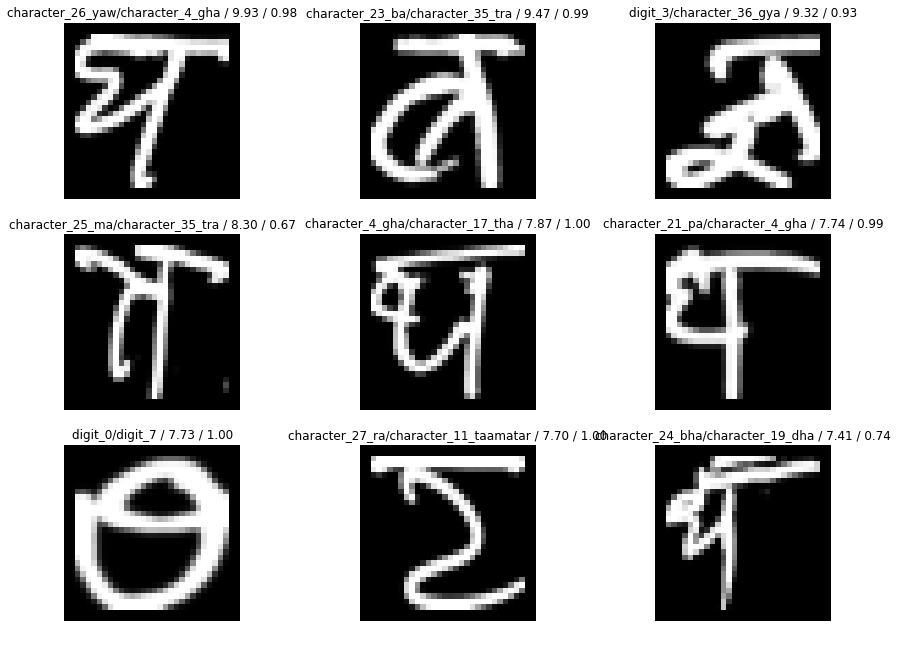

In [ ]:
interp.plot_top_losses(9, figsize=(15,11))

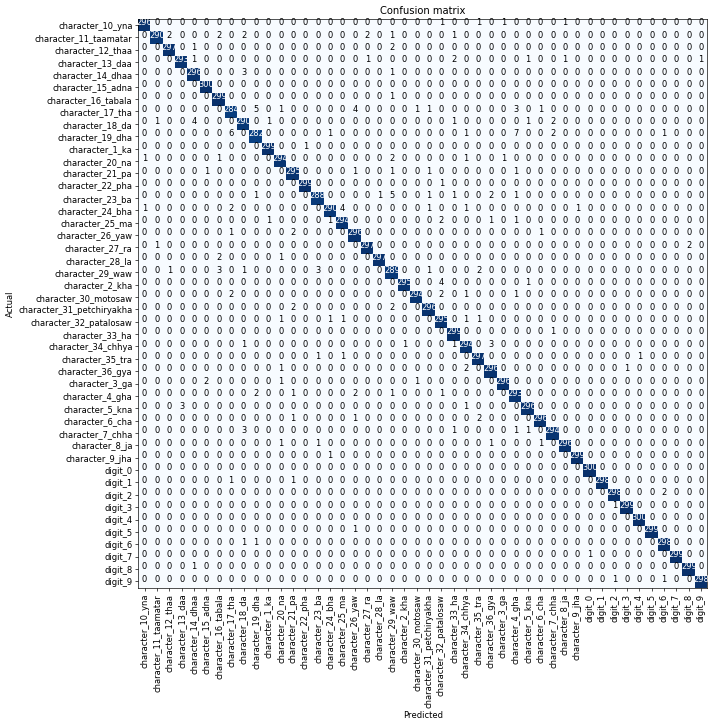

In [ ]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [ ]:
interp.most_confused(min_val=2)

[('character_19_dha', 'character_4_gha', 7),
 ('character_19_dha', 'character_17_tha', 6),
 ('character_17_tha', 'character_19_dha', 5),
 ('character_23_ba', 'character_29_waw', 5),
 ('character_17_tha', 'character_26_yaw', 4),
 ('character_18_da', 'character_14_dhaa', 4),
 ('character_24_bha', 'character_25_ma', 4),
 ('character_2_kha', 'character_32_patalosaw', 4),
 ('character_14_dhaa', 'character_18_da', 3),
 ('character_17_tha', 'character_4_gha', 3),
 ('character_29_waw', 'character_16_tabala', 3),
 ('character_29_waw', 'character_23_ba', 3),
 ('character_34_chhya', 'character_36_gya', 3),
 ('character_5_kna', 'character_13_daa', 3),
 ('character_7_chha', 'character_18_da', 3)]